In [1]:
import pandas
import numpy as np
from ipywidgets import *
import sqlalchemy 

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/home/main/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
import sklearn.cluster as cluster
import sklearn 

In [4]:
import plotly.plotly as py
py.plotly.tools.set_credentials_file(username='zestela', api_key='zbvqdfpjh3')
import plotly.plotly as py
import plotly.graph_objs as go

In [5]:
groupdata = "Group Level Data.xlsx"
disk_engine = sqlalchemy.create_engine('sqlite:///myStatusDB.db')

In [6]:
all_ = pandas.read_excel(groupdata,encoding='utf-8')
group_pd = all_.loc[:,'Status':'Choice'] 
group_pd = group_pd.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x) ))
group_pd['Demographic'] = all_.Group

[str(c) for c in  group_pd.columns.values]

['Status', 'Ideology', 'Conventionalism', 'Choice', 'Demographic']

In [7]:
# Load table to SQL

def try_load():
    try:
        pandas.read_sql_query('''DROP TABLE StaIdeConv''',  disk_engine)
    
    except Exception as  e:
#         print type(e), e
        pass
    try:
        group_pd.to_sql('StaIdeConv', disk_engine)
    except Exception as  e:
#         print type(e), e
        pass
        
try_load()


In [8]:
S = pandas.read_sql_query('''
SELECT ROUND(Status,2) as 'Status', Demographic FROM StaIdeConv
ORDER BY Status Desc

''',  disk_engine)
S

,Status,Demographic
0,0.54,Rich People
1,0.43,Big Business
2,0.26,Whites
3,0.19,The Military
4,0.16,Conservatives
5,0.15,Asian-Americans
6,0.14,Christians
7,0.12,Catholics
8,0.10,Middle Class People
9,0.04,Liberals


In [9]:
C = pandas.read_sql_query('''
SELECT ROUND(Choice,2) as 'Choice', Demographic FROM StaIdeConv
ORDER BY Choice Desc
''',  disk_engine)
C

,Choice,Demographic
0,0.34,Conservatives
1,0.34,Tea Party
2,0.33,Liberals
3,0.33,Christians
4,0.32,Atheists
5,0.30,Christian Fundamentalists
6,0.29,Feminists
7,0.29,The Military
8,0.28,Catholics
9,0.21,Big Business


In [10]:
D3 = pandas.read_sql_query('''
SELECT * FROM StaIdeConv
ORDER BY Demographic Asc
''',  disk_engine)

D3.drop('index',1)

,Status,Ideology,Conventionalism,Choice,Demographic
0,0.145475,0.000244,0.078881,-0.611473,Asian-Americans
1,-0.053154,-0.298026,-0.485323,0.316074,Atheists
2,0.430969,0.250053,0.155618,0.212151,Big Business
3,-0.151070,-0.219293,-0.100539,-0.663434,Blacks
4,0.115820,0.211640,0.323164,0.278750,Catholics
5,-0.010071,0.391620,0.247526,0.300851,Christian Fundamentalists
6,0.142677,0.269387,0.366920,0.332906,Christians
7,0.158204,0.476967,0.426506,0.335541,Conservatives
8,-0.046020,-0.362514,-0.465534,0.288556,Feminists
9,-0.069800,-0.390624,-0.573494,-0.374061,Gay Men and Lesbians


In [11]:
SC = pandas.read_sql_query('''
SELECT Status, Ideology, Conventionalism, Choice, Demographic FROM StaIdeConv
ORDER BY Demographic Asc
''',  disk_engine)

In [12]:
cmap = sns.cubehelix_palette(2, start=.66, rot=-.75,as_cmap=True)
cmap2 = sns.cubehelix_palette(start=2.8, rot=.1,as_cmap=True)
cmap3 = sns.dark_palette("purple",as_cmap=True)


/home/main/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning:

No labelled objects found. Use label='...' kwarg on individual plots.



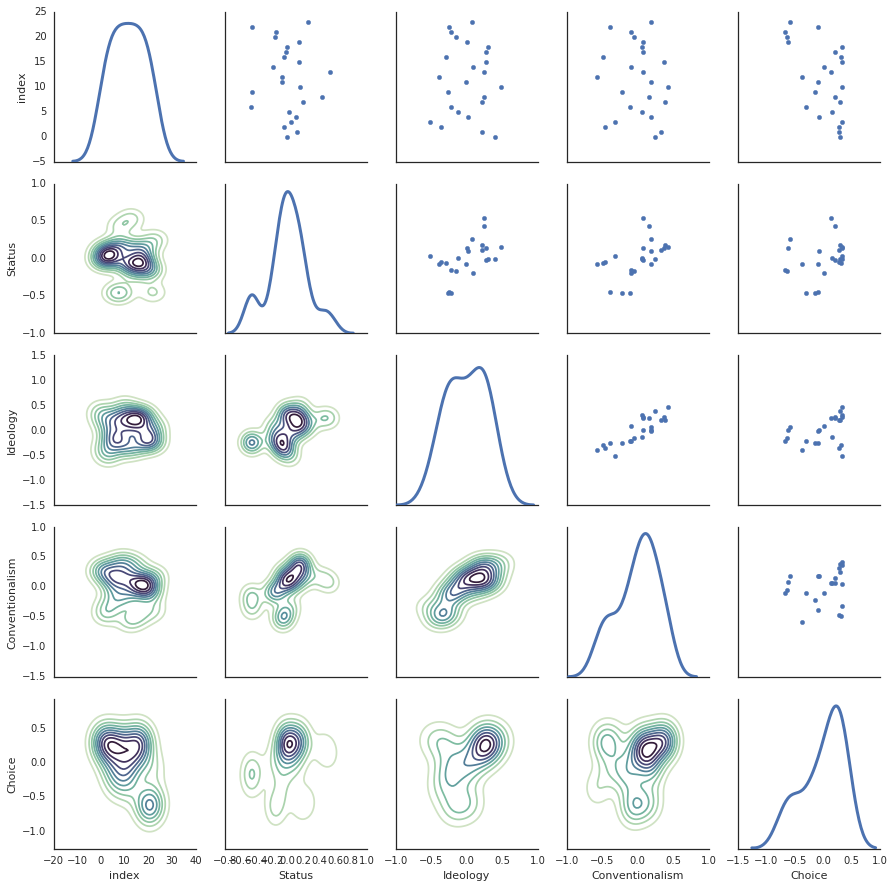

In [13]:
sns.set(style='white')
g = sns.PairGrid(D3, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap=cmap)
g.map_upper(plt.scatter,cmap=cmap)
g.map_diag(sns.kdeplot, lw=3)
g

/home/main/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning:

findfont: Font family [u'Hack'] not found. Falling back to Bitstream Vera Sans



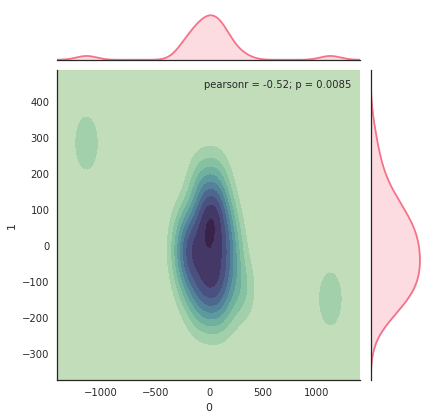

In [14]:

model=sklearn.manifold.TSNE(perplexity=7,n_components=2)
# model = sklearn.decomposition.TruncatedSVD(n_components=2)
# model = sklearn.decomposition.FastICA(n_components=2) #good
TS = pandas.DataFrame(model.fit_transform(D3.drop('Demographic',1)))
TS = TS.join(D3.Demographic)


sns.set(palette='husl',font='Hack',style="white",font_scale=1)
p = sns.jointplot(TS[0],TS[1],kind='kde',cmap=cmap)

In [15]:
print model.__doc__


t-distributed Stochastic Neighbor Embedding.

    t-SNE [1] is a tool to visualize high-dimensional data. It converts
    similarities between data points to joint probabilities and tries
    to minimize the Kullback-Leibler divergence between the joint
    probabilities of the low-dimensional embedding and the
    high-dimensional data. t-SNE has a cost function that is not convex,
    i.e. with different initializations we can get different results.

    It is highly recommended to use another dimensionality reduction
    method (e.g. PCA for dense data or TruncatedSVD for sparse data)
    to reduce the number of dimensions to a reasonable amount (e.g. 50)
    if the number of features is very high. This will suppress some
    noise and speed up the computation of pairwise distances between
    samples. For more tips see Laurens van der Maaten's FAQ [2].

    Read more in the :ref:`User Guide <t_sne>`.

    Parameters
    ----------
    n_components : int, optional (default: 2)
     

In [16]:
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.7, 's' : 80, 'linewidths':0}
# # plt.scatter(TS[0], TS[1], c='b', **plot_kwds)
# frame = plt.gca()
# frame.axes.get_xaxis().set_visible(False)
# frame.axes.get_yaxis().set_visible(False)

def plot_clusters(data, algorithm, args, kwds):

    labels = algorithm(*args, **kwds).fit_predict(data.drop('Demographic',1))

    palette = sns.color_palette('hls', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(TS[0], TS[1], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    for xy in range(data.count()[0]): 
        ann =  data['Demographic'][xy]# <--
        cord = data.drop('Demographic',1)
        cord_x = cord[0][xy]
        cord_y = cord[1][xy]
        cords_xy =  (cord_x, cord_y)    
        plt.annotate(ann, xy=cords_xy,fontsize=12,textcoords='data') # <--
    plt.title(' '.join(['Clusters found by', model.__module__.split('.')[-1] , 'and',str(algorithm.__name__)]), fontsize=20)


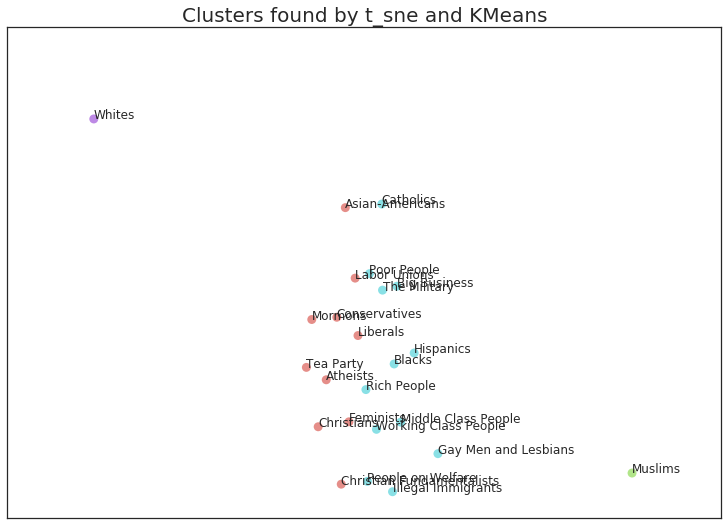

In [17]:
plot_clusters(TS,cluster.KMeans, (), {'n_clusters':4})

In [18]:
D3

,index,Status,Ideology,Conventionalism,Choice,Demographic
0,19,0.145475,0.000244,0.078881,-0.611473,Asian-Americans
1,16,-0.053154,-0.298026,-0.485323,0.316074,Atheists
2,8,0.430969,0.250053,0.155618,0.212151,Big Business
3,21,-0.151070,-0.219293,-0.100539,-0.663434,Blacks
4,1,0.115820,0.211640,0.323164,0.278750,Catholics
5,0,-0.010071,0.391620,0.247526,0.300851,Christian Fundamentalists
6,15,0.142677,0.269387,0.366920,0.332906,Christians
7,10,0.158204,0.476967,0.426506,0.335541,Conservatives
8,2,-0.046020,-0.362514,-0.465534,0.288556,Feminists
9,12,-0.069800,-0.390624,-0.573494,-0.374061,Gay Men and Lesbians


In [19]:
a = D3.Status

# Create a trace
trace = go.Scatter3d(
    x = D3.Ideology,
    y = D3.Choice,
    z = D3.Conventionalism,
    mode = 'markers',
    text = D3.Demographic,
    marker=dict(
        size=12,
        color=a,                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8)
    
)

layout=go.Layout(width=800, height=800, title = 'Status',
              scene = dict(xaxis=dict(title='Ideology',
                                      titlefont=dict(color='rgb(220, 220, 220)')),
                            yaxis=dict(title='Choice',
                                       titlefont=dict(color='rgb(220, 220, 220)')),
                            zaxis=dict(title='Conventionalism',
                                       titlefont=dict(color='rgb(220, 220, 220)')),
                            bgcolor = 'rgb(20, 24, 54)'
                           )
             )

data = [trace]
fig=dict(data=data, layout=layout)

# Plot and embed in ipython notebook!
py.iplot(fig, filename='simple-3d-scatter')


In [20]:
a = D3.Choice

# Create a trace
trace = go.Scatter3d(
    x = D3.Ideology,
    y = D3.Status,
    z = D3.Conventionalism,
    mode = 'markers',
    text = D3.Demographic,
    marker=dict(
        size=12,
        color=a,                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8)
    
)

layout=go.Layout(width=800, height=800, title = 'Status',
              scene = dict(xaxis=dict(title='Ideology',
                                      titlefont=dict(color='rgb(220, 220, 220)')),
                            yaxis=dict(title='Status',
                                       titlefont=dict(color='rgb(220, 220, 220)')),
                            zaxis=dict(title='Conventionalism',
                                       titlefont=dict(color='rgb(220, 220, 220)')),
                            bgcolor = 'rgb(20, 24, 54)'
                           )
             )


data = [trace]
fig=dict(data=data, layout=layout)






# Plot and embed in ipython notebook!
py.iplot(fig, filename='simple-3d-scatter')

In [21]:
corrmat = D3.corr()
# Remove 'index' labels
corrmat = corrmat.drop(corrmat.index[0],1)
corrmat = corrmat.drop(corrmat.index[0],0)

corrmat

,Status,Ideology,Conventionalism,Choice
Status,1.000000,0.537477,0.513531,0.280994
Ideology,0.537477,1.000000,0.849522,0.363240
Conventionalism,0.513531,0.849522,1.000000,0.196453
Choice,0.280994,0.363240,0.196453,1.000000


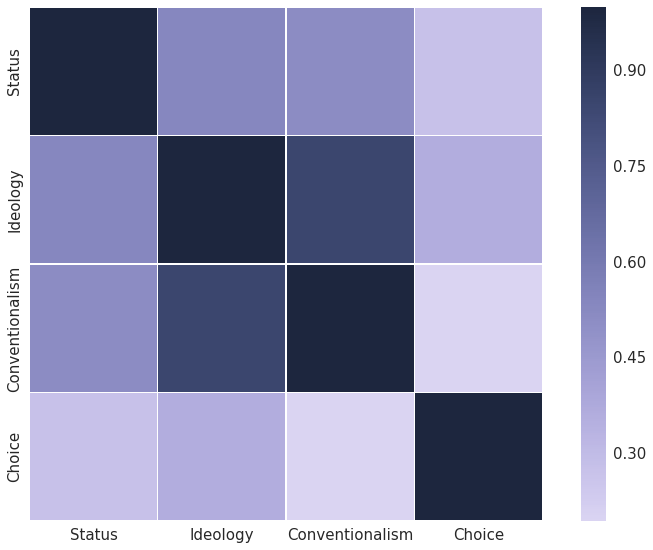

In [22]:
sns.set(font_scale = 1.5,  font="Hack")

# Load the datset of correlations between cortical brain networks

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 8))

# Draw the heatmap using seaborn


sns.heatmap(corrmat, robust = True, linewidths=.5, square=True, cmap=cmap2)

f.tight_layout()

In [23]:
Gr = [g for g in group_pd['Demographic'] ]
a = SelectMultiple(
    width = 900,
    description="You",
    options= Gr
    
)
a




In [24]:
df = group_pd[group_pd['Demographic'].isin(a.value)]
df

,Status,Ideology,Conventionalism,Choice,Demographic
21,-0.15107,-0.219293,-0.100539,-0.663434,Blacks


In [25]:
def denorm(n):
    return round( n.mean()*100,1)


In [26]:
selection =  { 'Groups': [', '.join([str(i) for (i) in a.value])],
              'Status': [denorm(df.Status)], 
              'Ideology': [denorm(df.Ideology)], 
              'Conventionalism':[denorm(df.Conventionalism)], 
              'Choice':[denorm(df.Choice)]}
myDemographics = pandas.DataFrame.from_dict(selection)

sortCols = ['Groups'] + [k for k in selection.keys() if k != 'Groups']

myDemographics = myDemographics.reindex(columns=[sortCols])
myDemographics

,Groups,Status,Ideology,Conventionalism,Choice
0,Blacks,-15.1,-21.9,-10.1,-66.3
